In [3]:
# --- Instalar (si hace falta) ---
# pip install requests pandas matplotlib

import requests, pandas as pd
import matplotlib.pyplot as plt

WB_BASE = "https://api.worldbank.org/v2"

def wb_fetch_indicator(countries, indicator, date="2015:2024", per_page=20000):
    """
    Devuelve un DataFrame: country, iso3, year, indicator, indicator_name, value
    countries: lista de códigos ISO2 (o ISO3) separados por ';' internamente
    """
    url = f"{WB_BASE}/country/{';'.join(countries)}/indicator/{indicator}"
    params = {"format": "json", "date": date, "per_page": per_page}
    r = requests.get(url, params=params, timeout=60)
    r.raise_for_status()
    j = r.json()
    if not isinstance(j, list) or len(j) < 2 or j[1] is None:
        return pd.DataFrame(columns=["country","iso3","year","indicator","indicator_name","value"])
    rows = j[1]
    df = pd.DataFrame(rows)
    df["country"] = df["country"].apply(lambda x: x["value"] if isinstance(x, dict) else x)
    df = df.rename(columns={"countryiso3code":"iso3","date":"year","value":"value"})
    df["year"]  = pd.to_numeric(df["year"], errors="coerce")
    df["value"] = pd.to_numeric(df["value"], errors="coerce")
    # nombre legible del indicador
    try:
        ind_name = rows[0]["indicator"]["value"]
    except Exception:
        ind_name = indicator
    df["indicator"] = indicator
    df["indicator_name"] = ind_name
    return df[["country","iso3","year","indicator","indicator_name","value"]].sort_values(["country","year"])

def wb_fetch_many(countries, indicators: dict, date="2015:2024"):
    """ indicators = {codigo: etiqueta_corta} """
    frames = []
    for code, label in indicators.items():
        dfi = wb_fetch_indicator(countries, code, date=date)
        if not dfi.empty:
            dfi["label"] = label
            frames.append(dfi)
    return pd.concat(frames, ignore_index=True) if frames else pd.DataFrame()

# --- Grupos de países ---
dev     = ["US","DE","JP"]                     # Desarrollados
pma     = ["ET","BD","HT"]                     # PMA (incluye Haití)
latam   = ["PE","MX","BR","CL","CO","AR"]      # América Latina
countries_all = dev + pma + latam

# --- Indicadores clave ODS 8 (+ algunos complementos) ---
inds = {
    "NY.GDP.PCAP.KD.ZG": "PIB pc (crec. %, real) [8.1]",
    "SL.GDP.PCAP.EM.KD": "Productividad laboral (PIB por ocupado, US$ const) [8.2]",
    "SL.UEM.TOTL.ZS":     "Desempleo total (% fuerza laboral) [8.5]",
    "SL.UEM.1524.ZS":     "Desempleo jóvenes 15-24 (% fuerza laboral) [8.5/8.6]",
    "SL.UEM.NEET.ZS":     "Jóvenes NEET 15-24 (% población) [8.6]",
    "FX.OWN.TOTL.ZS":     "Adultos con cuenta (% 15+, Findex) [8.10]",
    # complementarios:
    "NY.GDP.MKTP.KD.ZG":  "PIB real (crec. %, total)",
    "EN.ATM.CO2E.PC":     "CO2 per cápita (t)"
}



In [4]:
# --- Descarga y guardado ---
tidy = wb_fetch_many(countries_all, inds, date="2015:2024")
tidy.to_csv("ods8_wb_indicators_2015_2024.csv", index=False)
print("Guardado: ods8_wb_indicators_2015_2024.csv")
print(tidy.head())

Guardado: ods8_wb_indicators_2015_2024.csv
     country iso3  year          indicator                    indicator_name  \
0  Argentina  ARG  2015  NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)   
1  Argentina  ARG  2016  NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)   
2  Argentina  ARG  2017  NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)   
3  Argentina  ARG  2018  NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)   
4  Argentina  ARG  2019  NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)   

      value                         label  
0  1.660913  PIB pc (crec. %, real) [8.1]  
1 -3.024501  PIB pc (crec. %, real) [8.1]  
2  1.916396  PIB pc (crec. %, real) [8.1]  
3 -3.415537  PIB pc (crec. %, real) [8.1]  
4 -2.695067  PIB pc (crec. %, real) [8.1]  


In [5]:
df = pd.read_csv("ods8_wb_indicators_2015_2024.csv")
print(df.head())

     country iso3  year          indicator                    indicator_name  \
0  Argentina  ARG  2015  NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)   
1  Argentina  ARG  2016  NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)   
2  Argentina  ARG  2017  NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)   
3  Argentina  ARG  2018  NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)   
4  Argentina  ARG  2019  NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)   

      value                         label  
0  1.660913  PIB pc (crec. %, real) [8.1]  
1 -3.024501  PIB pc (crec. %, real) [8.1]  
2  1.916396  PIB pc (crec. %, real) [8.1]  
3 -3.415537  PIB pc (crec. %, real) [8.1]  
4 -2.695067  PIB pc (crec. %, real) [8.1]  


In [8]:
import pandas as pd
import numpy as np
from pandas import DataFrame
df = DataFrame(pd.read_csv("ods8_wb_indicators_2015_2024.csv"))
print(df.head())

     country iso3  year          indicator                    indicator_name  \
0  Argentina  ARG  2015  NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)   
1  Argentina  ARG  2016  NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)   
2  Argentina  ARG  2017  NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)   
3  Argentina  ARG  2018  NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)   
4  Argentina  ARG  2019  NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)   

      value                         label  
0  1.660913  PIB pc (crec. %, real) [8.1]  
1 -3.024501  PIB pc (crec. %, real) [8.1]  
2  1.916396  PIB pc (crec. %, real) [8.1]  
3 -3.415537  PIB pc (crec. %, real) [8.1]  
4 -2.695067  PIB pc (crec. %, real) [8.1]  


In [9]:
df.head(15)

,country,iso3,year,indicator,indicator_name,value,label
0,Argentina,ARG,2015,NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %),1.660913,"PIB pc (crec. %, real) [8.1]"
1,Argentina,ARG,2016,NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %),-3.024501,"PIB pc (crec. %, real) [8.1]"
2,Argentina,ARG,2017,NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %),1.916396,"PIB pc (crec. %, real) [8.1]"
3,Argentina,ARG,2018,NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %),-3.415537,"PIB pc (crec. %, real) [8.1]"
4,Argentina,ARG,2019,NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %),-2.695067,"PIB pc (crec. %, real) [8.1]"
5,Argentina,ARG,2020,NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %),-10.336110,"PIB pc (crec. %, real) [8.1]"
6,Argentina,ARG,2021,NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %),10.148560,"PIB pc (crec. %, real) [8.1]"
7,Argentina,ARG,2022,NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %),5.048195,"PIB pc (crec. %, real) [8.1]"
8,Argentina,ARG,2023,NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %),-1.892950,"PIB pc (crec. %, real) [8.1]"
9,Argentina,ARG,2024,NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %),-2.058403,"PIB pc (crec. %, real) [8.1]"


In [10]:
print(df["indicator_name"].unique())

['GDP per capita growth (annual %)'
 'GDP per person employed (constant 2021 PPP $)'
 'Unemployment, total (% of total labor force) (modeled ILO estimate)'
 'Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)'
 'Share of youth not in education, employment or training, total (% of youth population)'
 'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)'
 'GDP growth (annual %)']


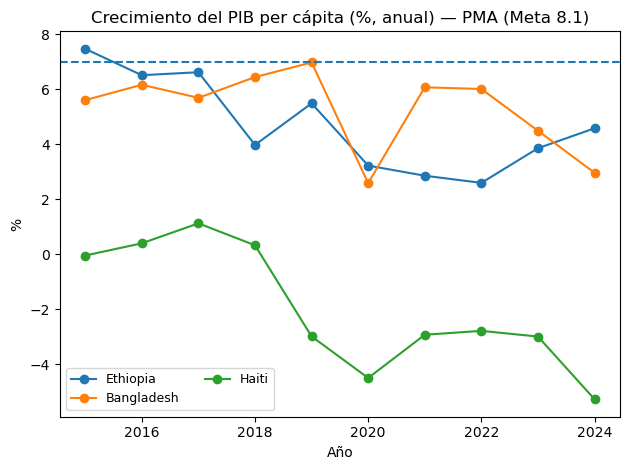

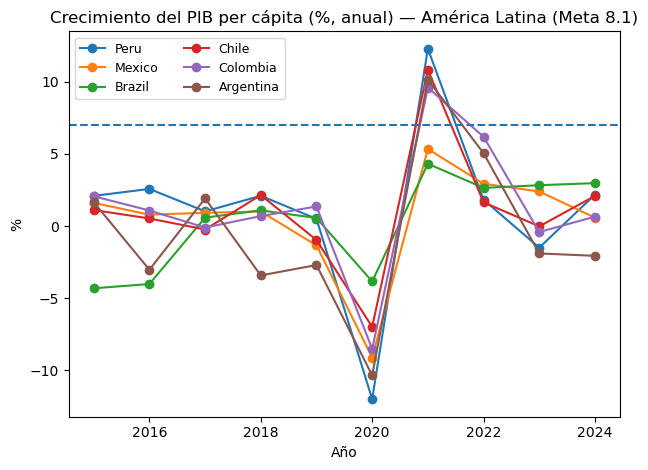

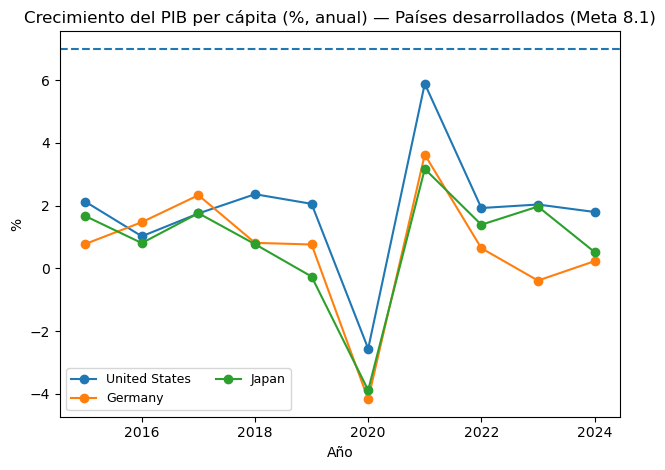

In [12]:
import matplotlib.pyplot as plt

# --- 1) Filtra el indicador Meta 8.1 ---
IND_NAME = "GDP per capita growth (annual %)"
gdp_pc = df[df["indicator_name"] == IND_NAME].dropna(subset=["value"]).copy()

# --- 2) Define los grupos de países (por NOMBRE como aparece en tu df) ---
pma = ["Ethiopia", "Bangladesh", "Haiti"]                # PMA (Haití es el PMA de ALC)
latam = ["Peru", "Mexico", "Brazil", "Chile", "Colombia", "Argentina"]  # ALC
desarrollados = ["United States", "Germany", "Japan"]    # desarrollados

def plot_group(data, countries, title, filename=None):
    plot_df = data[data["country"].isin(countries)].sort_values(["country", "year"])
    plt.figure()
    for c in countries:
        s = plot_df[plot_df["country"] == c]
        if s.empty: 
            continue
        plt.plot(s["year"], s["value"], marker="o", label=c)
    # línea de referencia 7% (umbral PMA)
    plt.axhline(7, linestyle="--")
    plt.title(title)
    plt.xlabel("Año")
    plt.ylabel("%")
    plt.legend(loc="best", ncol=2, fontsize=9)
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=200, bbox_inches="tight")
    plt.show()

# --- 3) Traza los tres gráficos (cada uno en su propia figura) ---
plot_group(
    gdp_pc, pma,
    "Crecimiento del PIB per cápita (%, anual) — PMA (Meta 8.1)",
    filename="gdp_pc_pma.png"
)

plot_group(
    gdp_pc, latam,
    "Crecimiento del PIB per cápita (%, anual) — América Latina (Meta 8.1)",
    filename="gdp_pc_latam.png"
)

plot_group(
    gdp_pc, desarrollados,
    "Crecimiento del PIB per cápita (%, anual) — Países desarrollados (Meta 8.1)",
    filename="gdp_pc_desarrollados.png"
)


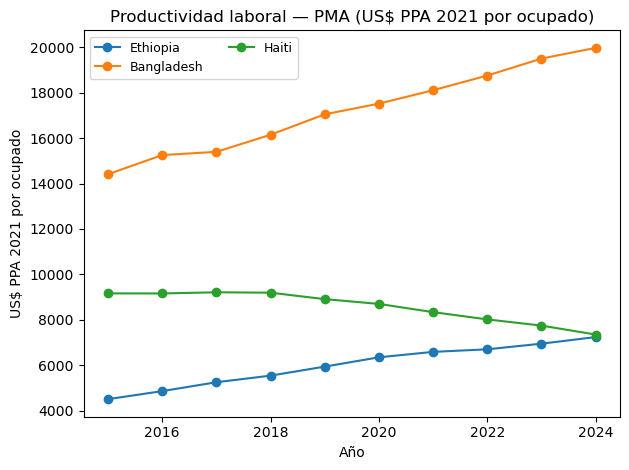

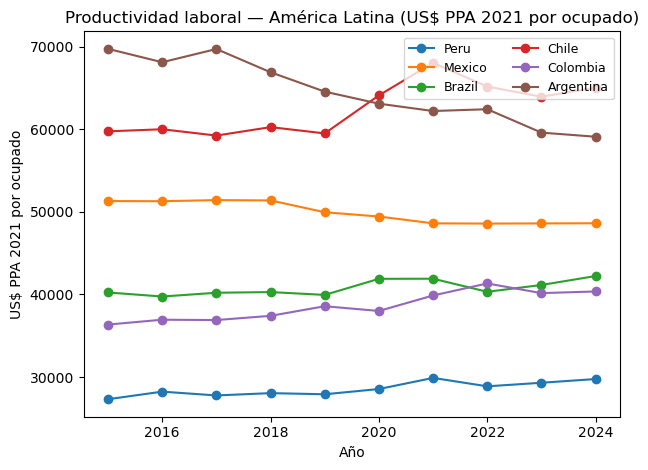

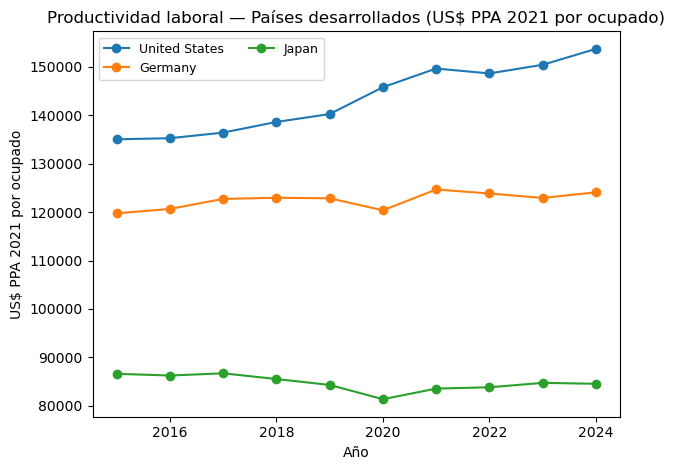

In [ ]:
import matplotlib.pyplot as plt

# --- indicador de productividad (tal como te salió en unique) ---
IND_NAME_PROD = "GDP per person employed (constant 2021 PPP $)"

prod = df[df["indicator_name"] == IND_NAME_PROD].dropna(subset=["value"]).copy()

# grupos por NOMBRE de país (ajusta si tus nombres difieren)
pma            = ["Ethiopia", "Bangladesh", "Haiti"]
latam          = ["Peru", "Mexico", "Brazil", "Chile", "Colombia", "Argentina"]
desarrollados  = ["United States", "Germany", "Japan"]

def plot_group_lines(data, countries, title, filename=None):
    sub = data[data["country"].isin(countries)].sort_values(["country","year"])
    plt.figure()
    for c in countries:
        s = sub[sub["country"] == c]
        if not s.empty:
            plt.plot(s["year"], s["value"], marker="o", label=c)
    plt.title(title)
    plt.xlabel("Año")
    plt.ylabel("US$ PPA 2021 por ocupado")
    plt.legend(loc="best", ncol=2, fontsize=9)
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=200, bbox_inches="tight")
    plt.show()

plot_group_lines(prod, pma,           "Productividad laboral — PMA (US$ PPA 2021 por ocupado)")
plot_group_lines(prod, latam,         "Productividad laboral — América Latina (US$ PPA 2021 por ocupado)")
plot_group_lines(prod, desarrollados, "Productividad laboral — Países desarrollados (US$ PPA 2021 por ocupado)")


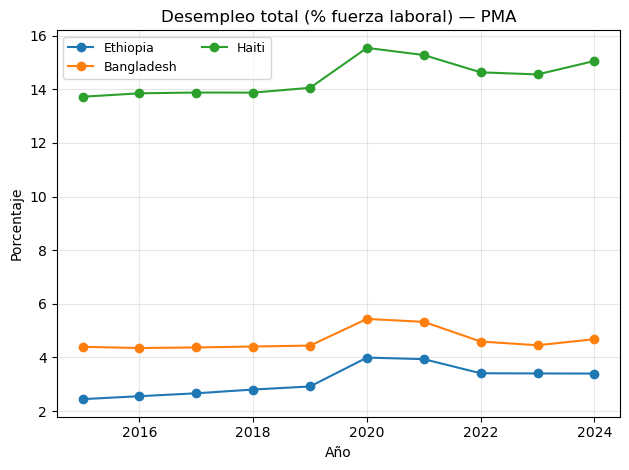

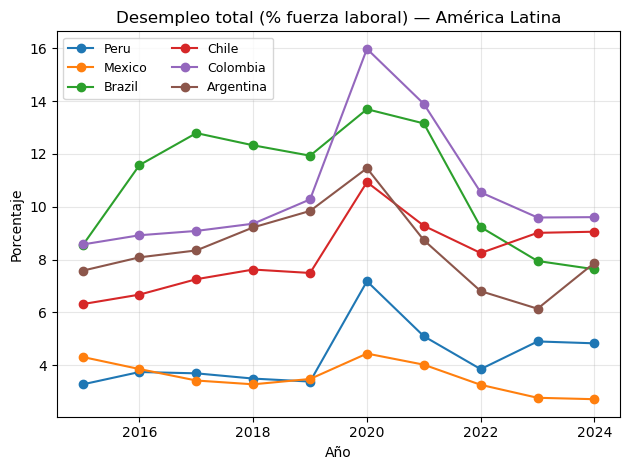

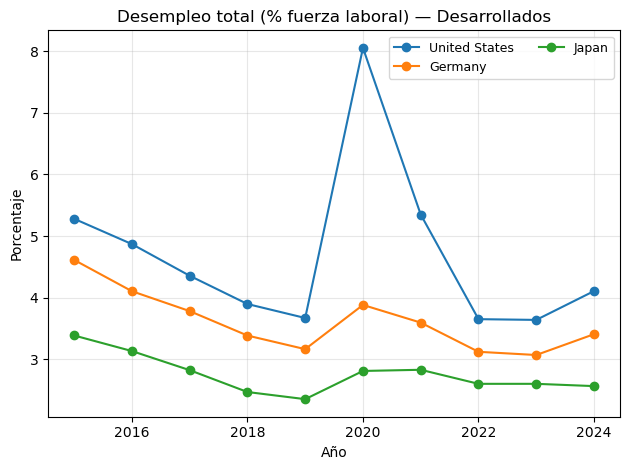

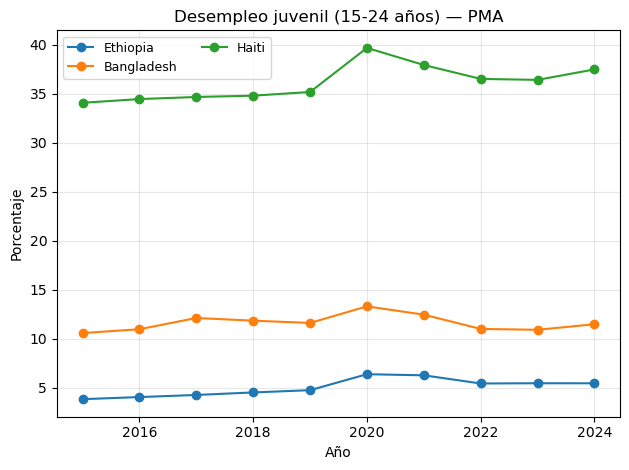

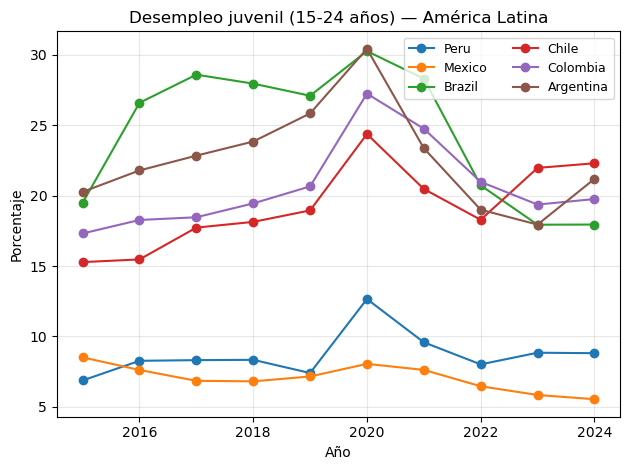

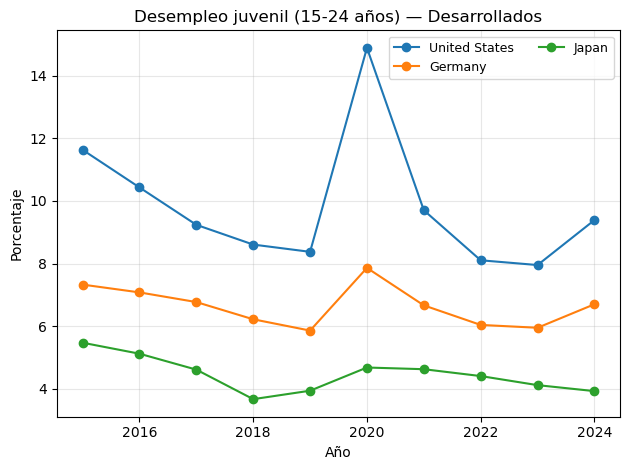

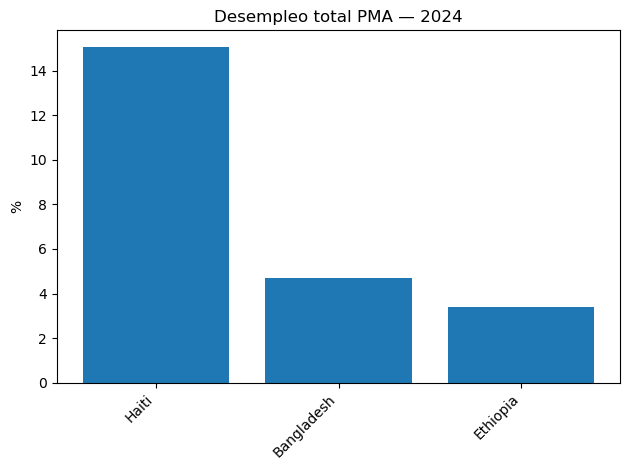

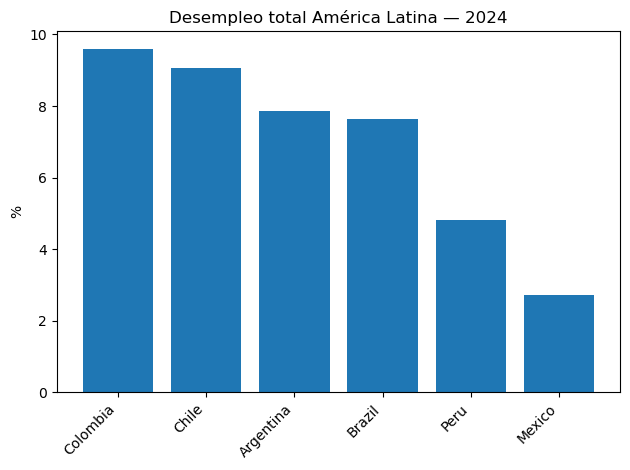

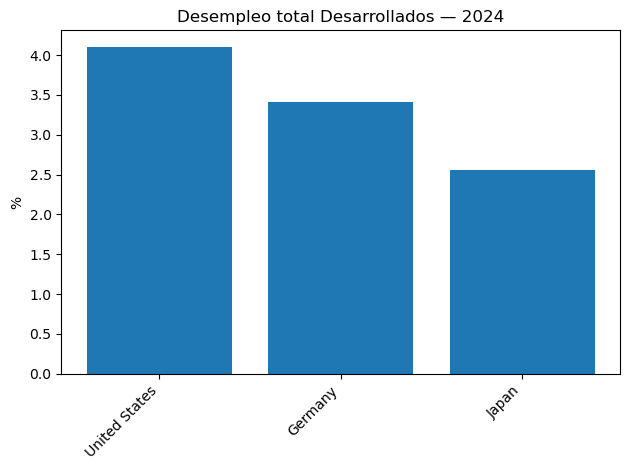

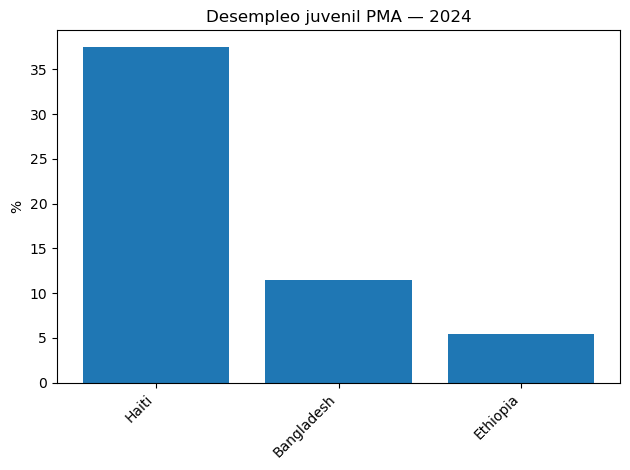

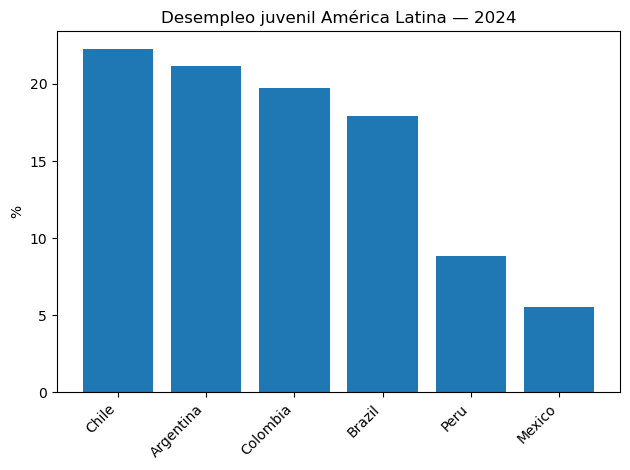

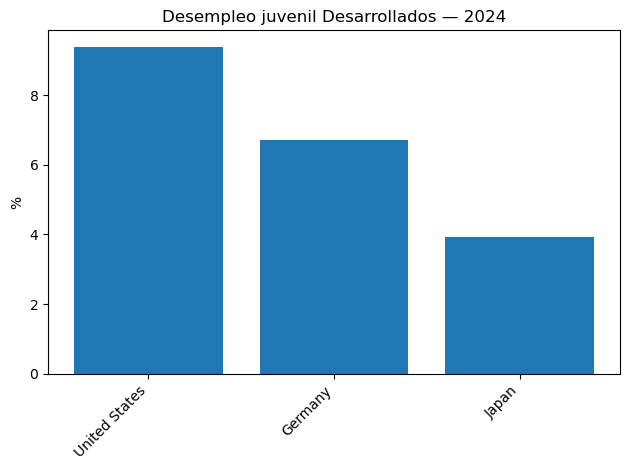

In [14]:
import matplotlib.pyplot as plt

# --- indicadores ---
IND_TOTAL = "Unemployment, total (% of total labor force) (modeled ILO estimate)"
IND_YOUTH = "Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)"

# --- filtrar ---
unemp_total = df[df["indicator_name"] == IND_TOTAL].dropna(subset=["value"])
unemp_youth = df[df["indicator_name"] == IND_YOUTH].dropna(subset=["value"])

# --- grupos ---
pma           = ["Ethiopia", "Bangladesh", "Haiti"]
latam         = ["Peru", "Mexico", "Brazil", "Chile", "Colombia", "Argentina"]
desarrollados = ["United States", "Germany", "Japan"]

# función genérica para líneas
def plot_group(data, countries, title, ylabel):
    sub = data[data["country"].isin(countries)].sort_values(["country","year"])
    plt.figure()
    for c in countries:
        s = sub[sub["country"] == c]
        if not s.empty:
            plt.plot(s["year"], s["value"], marker="o", label=c)
    plt.title(title)
    plt.xlabel("Año")
    plt.ylabel(ylabel)
    plt.legend(loc="best", ncol=2, fontsize=9)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# --- líneas: desempleo total ---
plot_group(unemp_total, pma,           "Desempleo total (% fuerza laboral) — PMA", "Porcentaje")
plot_group(unemp_total, latam,         "Desempleo total (% fuerza laboral) — América Latina", "Porcentaje")
plot_group(unemp_total, desarrollados, "Desempleo total (% fuerza laboral) — Desarrollados", "Porcentaje")

# --- líneas: desempleo juvenil ---
plot_group(unemp_youth, pma,           "Desempleo juvenil (15-24 años) — PMA", "Porcentaje")
plot_group(unemp_youth, latam,         "Desempleo juvenil (15-24 años) — América Latina", "Porcentaje")
plot_group(unemp_youth, desarrollados, "Desempleo juvenil (15-24 años) — Desarrollados", "Porcentaje")

# --- barras del último año (ej. 2023) ---
def bar_last_year(data, countries, title):
    sub = data[data["country"].isin(countries)]
    last_year = int(sub["year"].max())
    y = sub[sub["year"] == last_year].sort_values("value", ascending=False)
    plt.figure()
    plt.bar(y["country"], y["value"])
    plt.title(f"{title} — {last_year}")
    plt.ylabel("%")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# barras para 2023
bar_last_year(unemp_total, pma,           "Desempleo total PMA")
bar_last_year(unemp_total, latam,         "Desempleo total América Latina")
bar_last_year(unemp_total, desarrollados, "Desempleo total Desarrollados")

bar_last_year(unemp_youth, pma,           "Desempleo juvenil PMA")
bar_last_year(unemp_youth, latam,         "Desempleo juvenil América Latina")
bar_last_year(unemp_youth, desarrollados, "Desempleo juvenil Desarrollados")


In [15]:
neet = pd.read_csv("EIP_NEET_SEX_RT_A-20250910T0003.csv")

In [ ]:
neet